# Heart Stroke Prediction Using Supervised Learning Algorithms.

In [1]:
# Importing All Required Libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss

In [2]:
# Uploading The Dataset.

sd = pd.read_csv('healthcare-dataset-stroke-data.csv')   # sd = stroke data

In [3]:
sd.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
sd.drop('id', axis=1, inplace=True)

In [5]:
sd.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data Preprocessing

In [6]:
sd.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [8]:
# Convering of 'age' datatype float into int

sd['age'].astype(int)   

0       67
1       61
2       80
3       49
4       79
        ..
5105    80
5106    81
5107    35
5108    51
5109    44
Name: age, Length: 5110, dtype: int32

In [9]:
#Checking for null values

sd.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
# Replacing the missing (bmi) value to most frequent value using mod.

sd['bmi'].fillna(sd['bmi'].mode()[0], inplace=True)

In [11]:
#Checking for null values again

sd.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [60]:
sd.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0,0,1,1,0,1,228,36,1,1
1,0,0,0,0,1,1,0,202,28,2,1
2,1,0,0,1,1,0,0,105,32,2,1
3,0,0,0,0,1,0,1,171,34,3,1
4,0,0,1,0,1,1,0,174,24,2,1


### Checking Values and their Value_counts in the columns

In [152]:
print("-------------------------------")
print(sd[['ever_married']].value_counts())
print("-------------------------------")
print(sd['work_type'].value_counts())
print("-------------------------------")
print(sd['gender'].value_counts())
print("-------------------------------")
print(sd['Residence_type'].value_counts())
print("-------------------------------")
print(sd['smoking_status'].value_counts())


-------------------------------
ever_married
1               3353
0               1757
dtype: int64
-------------------------------
0    2925
1     819
2     687
3     657
4      22
Name: work_type, dtype: int64
-------------------------------
0    2994
1    2115
2       1
Name: gender, dtype: int64
-------------------------------
1    2596
0    2514
Name: Residence_type, dtype: int64
-------------------------------
2    1892
0    1544
1     885
3     789
Name: smoking_status, dtype: int64


### Replacing the values in columns with numerical values

1. Residence Type: Urban = 1, Rural = 0

2. Smoking Status: formerly smoked = 1, never smoked = 2, smokes = 3, Unknown = 0

3. Ever_Maried : Yes = 1, No = 0

4. Gender : Male = 1, Female = 0, Other = 2

5. Work Type : Private = 0, Self-employed = 1, children = 2, Govt_job = 3, Never_worked = 4


In [13]:
sd['Residence_type'].replace({'Urban' : 1, 'Rural' : 0}, inplace = True)
sd['ever_married'].replace({'Yes' : 1, 'No' : 0}, inplace = True)
sd['gender'].replace({'Male' : 1, 'Female' : 0, 'Other' : 2}, inplace = True)
sd['smoking_status'].replace({'formerly smoked' : 1, 'never smoked' : 2, 'smokes' : 3, 'Unknown' : 0}, inplace = True)
sd['work_type'].replace({'Private':0, 'Self-employed':1, 'children':2, 'Govt_job':3, 'Never_worked':4}, inplace = True)

While checking the null values, BMI Column had 201 null values, 
which has been treated by replacing with the most frequently used value by mod. Letter on value counts has been checked for columns 
like ever_married, work_type, gender, presidence_type and 
Smoking_status. 

# Exploratory Data Analysis

### Finding Correlation between the Variables

In [23]:
sd.corr()['stroke'][:-1].sort_values()

work_type           -0.032098
gender               0.008929
Residence_type       0.015458
smoking_status       0.028123
bmi                  0.038257
ever_married         0.108340
hypertension         0.127904
avg_glucose_level    0.131945
heart_disease        0.134914
age                  0.245257
Name: stroke, dtype: float64

<AxesSubplot:>

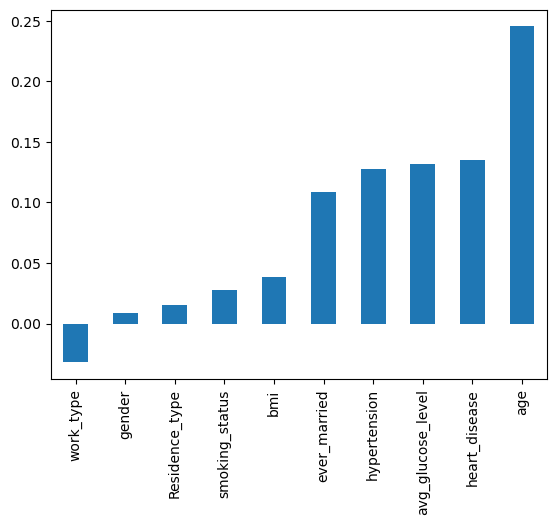

In [24]:
#Plotting Correlation with a Bargraph

sd.corr()['stroke'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

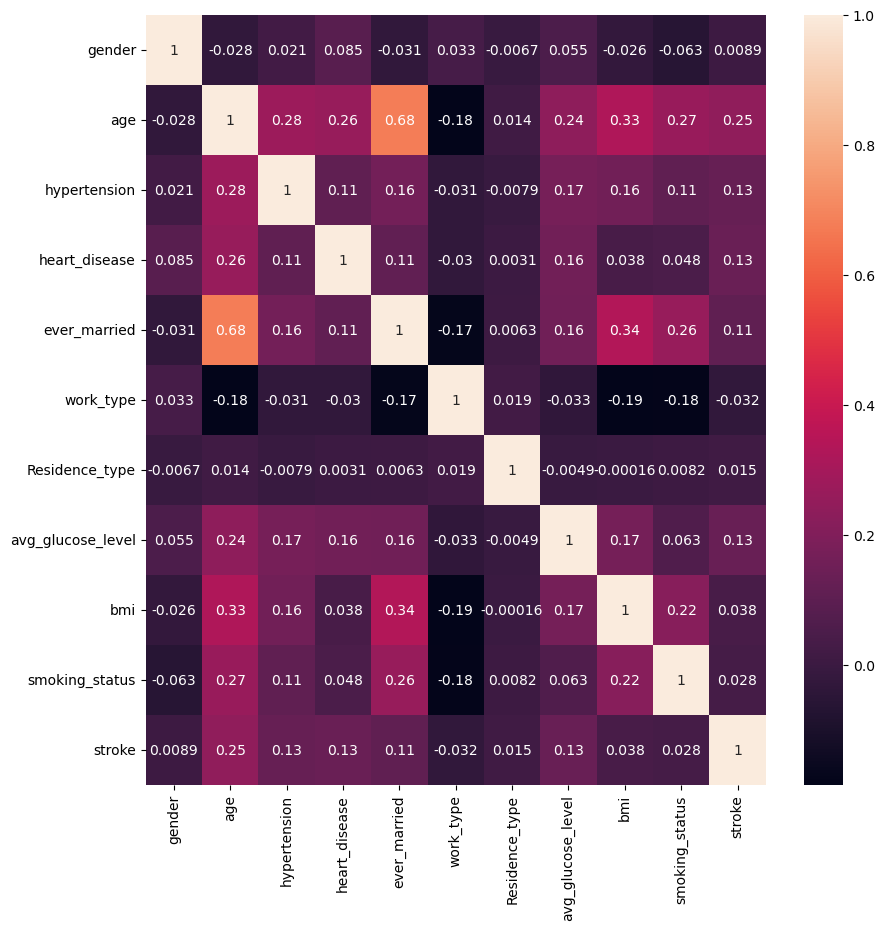

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(sd.corr(), annot=True)

#### Replacing age number with respect to age group (For better and smooth analysis)

In [29]:
# 0 = 0-12 , 1 = 13-19 , 2 = 20-30 , 3 = 31-60 , 4 = 61-100 

sd['age'] = pd.cut(x=sd['age'], bins=[0, 12, 19, 30, 60, 100], labels=[0, 1, 2, 3,4])
sd.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0,0,1,1,0,1,228.69,36.6,1,1
1,0,0,0,0,1,1,0,202.21,28.7,2,1
2,1,0,0,1,1,0,0,105.92,32.5,2,1
3,0,0,0,0,1,0,1,171.23,34.4,3,1
4,0,0,1,0,1,1,0,174.12,24.0,2,1


## Visualizing the Data:

<AxesSubplot:xlabel='gender', ylabel='count'>

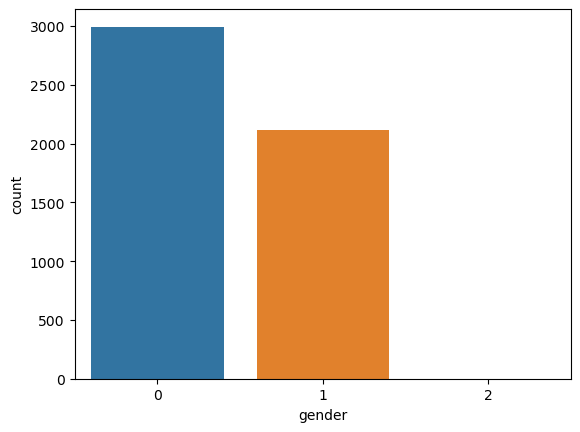

In [31]:
sns.countplot(x = 'gender', data = sd)

In [92]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

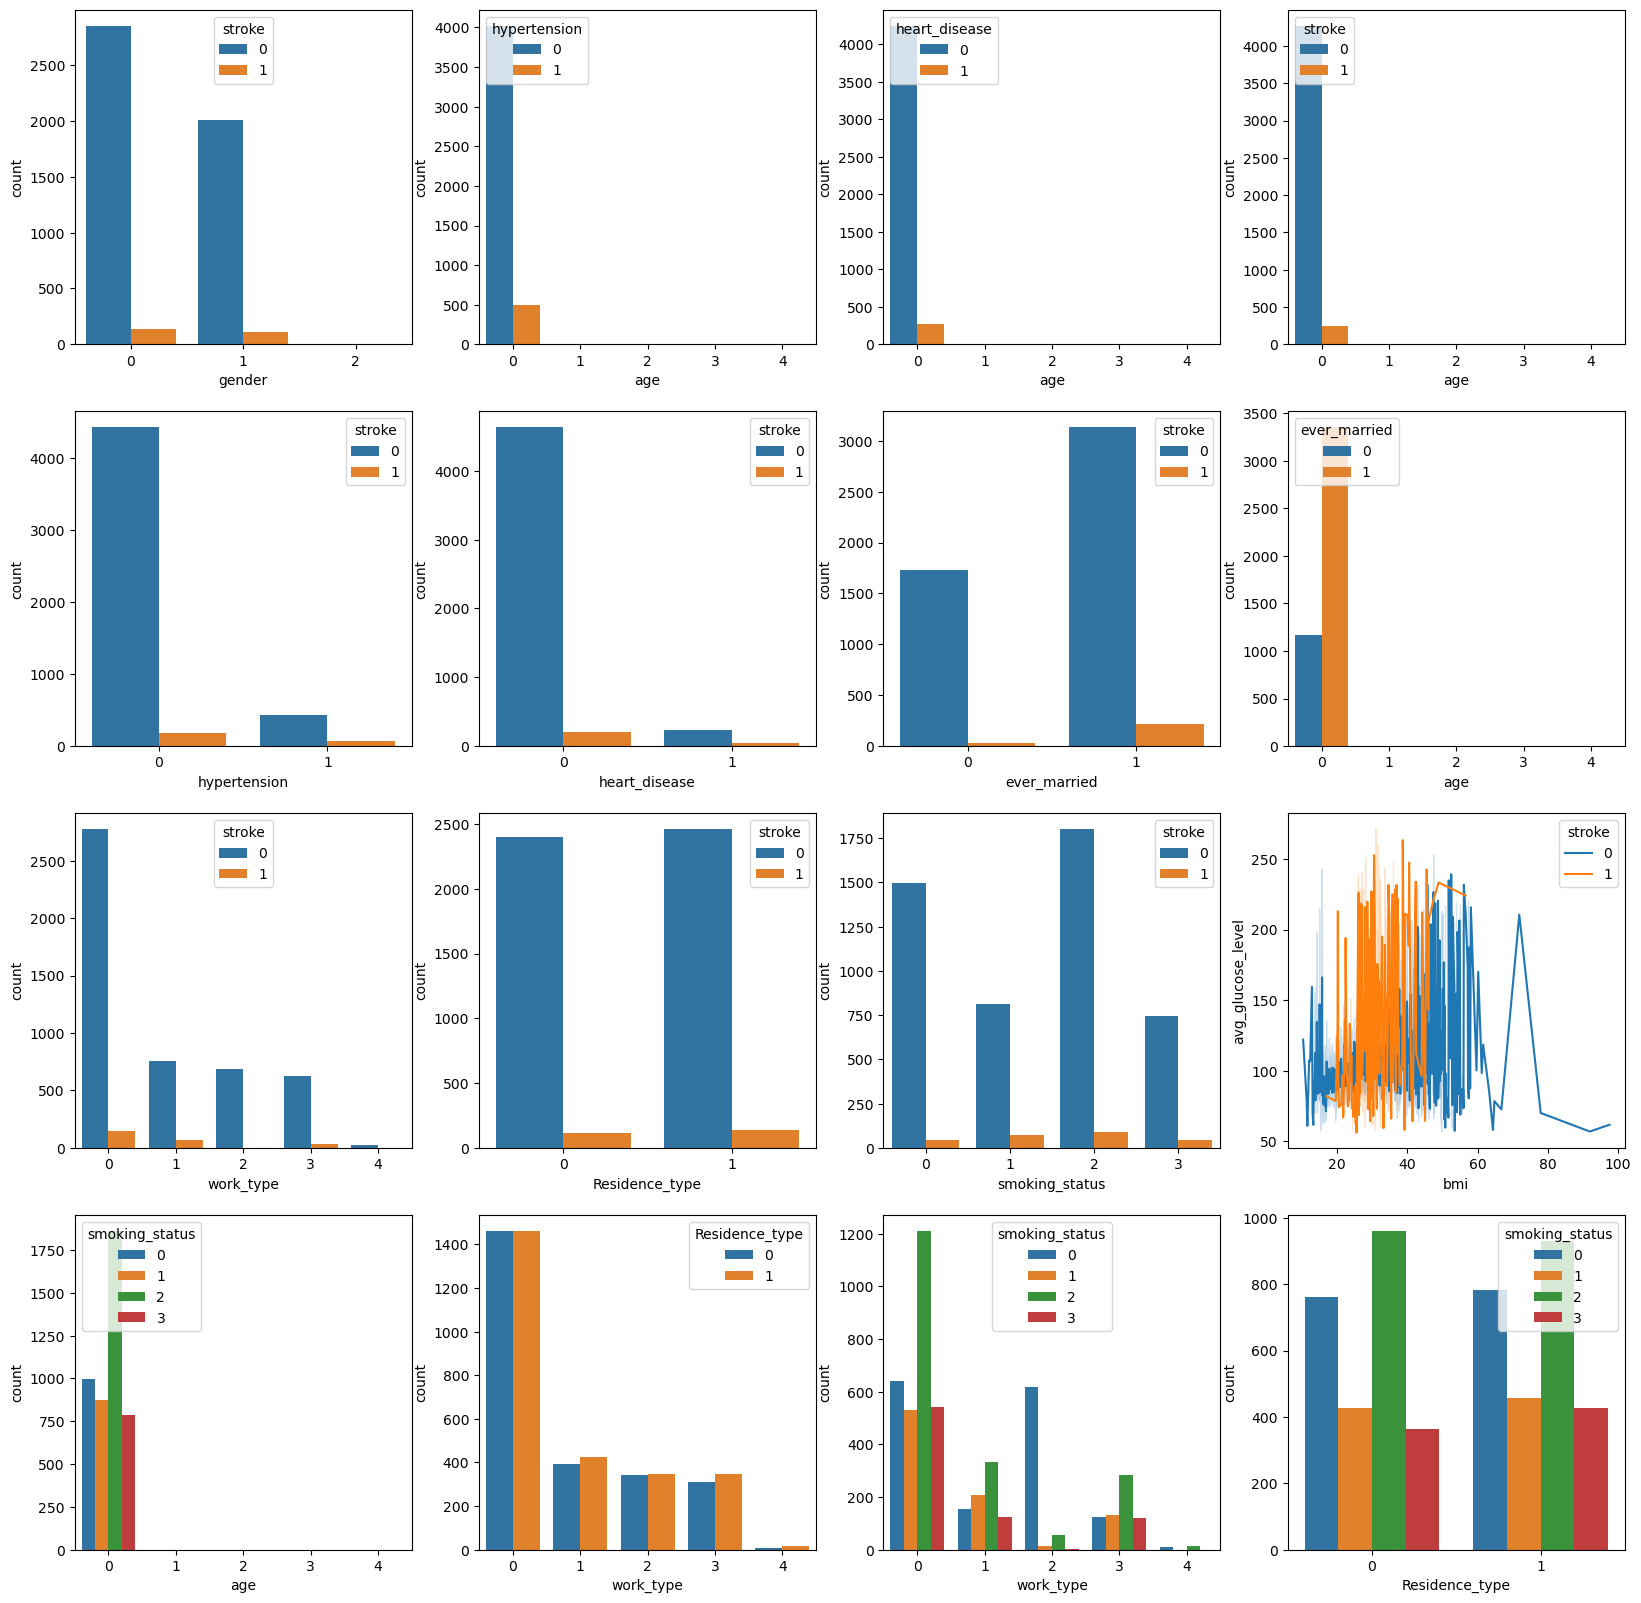

In [34]:
fig, ax = plt.subplots(4,4,figsize=(20, 20))
sns.countplot(x = 'gender', data = sd,hue = 'stroke', ax=ax[0,0])
sns.countplot(x = 'age', data = sd, hue = 'hypertension', ax=ax[0,1])
sns.countplot(x = 'age', data = sd, hue = 'heart_disease', ax=ax[0,2])
sns.countplot(x = 'age', data = sd, hue = 'stroke', ax=ax[0,3])
sns.countplot(x = 'hypertension', data = sd, hue = 'stroke', ax=ax[1,0])
sns.countplot(x = 'heart_disease', data = sd, hue = 'stroke', ax=ax[1,1])
sns.countplot(x = 'ever_married', data = sd, hue = 'stroke', ax=ax[1,2])
sns.countplot(x = 'age', data = sd, hue = 'ever_married', ax=ax[1,3])
sns.countplot(x = 'work_type', data = sd,hue = 'stroke', ax=ax[2,0])
sns.countplot(x = 'Residence_type', data = sd,hue = 'stroke', ax=ax[2,1])
sns.countplot(x = 'smoking_status', data = sd,hue = 'stroke', ax=ax[2,2])
sns.lineplot(x = 'bmi', y = 'avg_glucose_level', data = sd,hue = 'stroke', ax=ax[2,3])
sns.countplot(x = 'age', data = sd,hue = 'smoking_status', ax=ax[3,0])
sns.countplot( x = 'work_type', data = sd,hue = 'Residence_type', ax=ax[3,1])
sns.countplot(x = 'work_type', data = sd,hue = 'smoking_status', ax=ax[3,2])
sns.countplot(x = 'Residence_type', data = sd,hue = 'smoking_status', ax=ax[3,3])

Values in cloumns has been replaced with numerical groups 
for better understanding of data and presenting it. Visualised a gender data which indicates that female stroke petients are more comparativly. Also other relationship between various features has been plotted.

# Train-Test Split

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(sd.drop('stroke', axis=1), sd['stroke'], test_size=0.2, random_state=42)

In [77]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((4088, 10), (1022, 10), (4088,), (1022,))

# Model Training

### Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
LR = LogisticRegression(max_iter=10000)
LR

LogisticRegression(max_iter=10000)

In [93]:
# Train the Model

LR.fit(X_train, Y_train)

# Predict the Value

pred = LR.predict(X_test)

In [94]:
pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [95]:
result = pd.DataFrame({'Actual' : Y_test, 'Predicted' : pred})

In [106]:
pred = LR.predict(X_test)
print("----------------------------------------")
print("Accuracy Score : ",accuracy_score(Y_test, pred))
print("----------------------------------------")

----------------------------------------
Accuracy Score :  0.9393346379647749
----------------------------------------


### Support Vector Machine (SVM)

In [97]:
from sklearn.svm import SVC

In [98]:
svm = SVC()
svm

SVC()

In [101]:
# Training the Model 

svm.fit(X_train, Y_train)

# Prediction of an Outcome

pred_svc_train = svm.predict(X_train)
pred_svc_test = svm.predict(X_test)

In [105]:
print("----------------------------------------")
print("Training Accuracy : ", accuracy_score(Y_train, pred_svc_train))
print("Testing Accuracy : ", accuracy_score(Y_test, pred_svc_test))
print("----------------------------------------")

----------------------------------------
Training Accuracy :  0.9542563600782779
Testing Accuracy :  0.9393346379647749
----------------------------------------


### Decision Tree Classifier

In [107]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
DT = DecisionTreeClassifier()
DT

DecisionTreeClassifier()

In [110]:
# Training the Model

DT.fit(X_train, Y_train)

# Prediction of the Model 

pred_DT_train = DT.predict(X_train)
pred_DT_test = DT.predict(X_test)

In [111]:
print("----------------------------------------")
print("Training Accuracy : ", accuracy_score(Y_train, pred_DT_train))
print("Testing Accuracy : ", accuracy_score(Y_test, pred_DT_test ))
print("----------------------------------------")

----------------------------------------
Training Accuracy :  0.99926614481409
Testing Accuracy :  0.898238747553816
----------------------------------------


### K-Nearest Neighbors

In [115]:
from sklearn.neighbors import KNeighborsClassifier

In [116]:
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [117]:
#training the model
knn.fit(X_train, Y_train)

#testing the model
pred_knn_train = knn.predict(X_train)
pred_knn_test = knn.predict(X_test)

In [118]:
print("----------------------------------------")
print("Training Accuracy : ", accuracy_score(Y_train, pred_knn_train))
print("Testing Accuracy : ", accuracy_score(Y_test,pred_knn_test ))
print("----------------------------------------")

----------------------------------------
Training Accuracy :  0.9552348336594912
Testing Accuracy :  0.9373776908023483
----------------------------------------


# Model Evaluation

### Logistics Regression

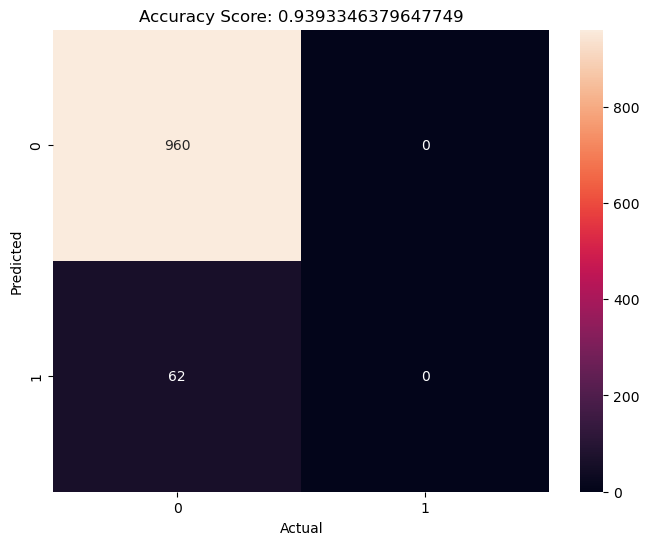

In [123]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(Y_test, pred), annot=True, fmt='d')
plt.title('Accuracy Score: {}'.format(accuracy_score(Y_test, pred)))
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

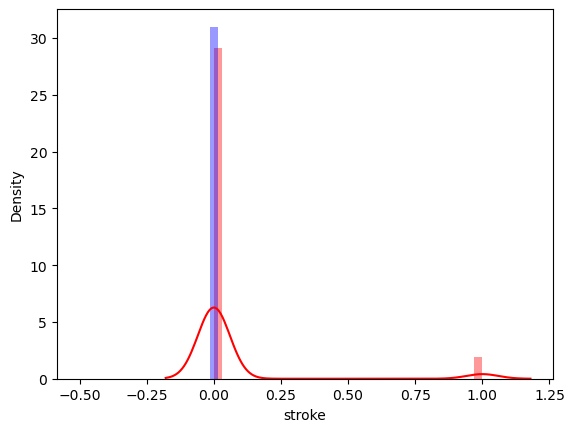

In [142]:
# Distributed plot for the predicted and actual values

ax = sns.distplot(Y_test, hist = True, label = 'Actual', color = 'r')
sns.distplot(pred, hist = True, label = 'Predicted', color = 'b', ax = ax)
plt.show()

In [124]:
print('Logistic Regression Model Accuracy Score:',accuracy_score(Y_test, pred))
print('Logistic Regression Model F1 score: ',metrics.f1_score(Y_test, pred))
print('Logistic Regression Model Mean Absolute Error: ',metrics.mean_absolute_error(Y_test, pred))
print('Logistic Regression Model Mean Squared Error: ',metrics.mean_squared_error(Y_test, pred))
print('Logistic Regression Model log loss: ',log_loss(Y_test, pred))

Logistic Regression Model Accuracy Score: 0.9393346379647749
Logistic Regression Model F1 score:  0.0
Logistic Regression Model Mean Absolute Error:  0.060665362035225046
Logistic Regression Model Mean Squared Error:  0.060665362035225046
Logistic Regression Model log loss:  2.0953073742509423


### Support Vector Machine (SVM)

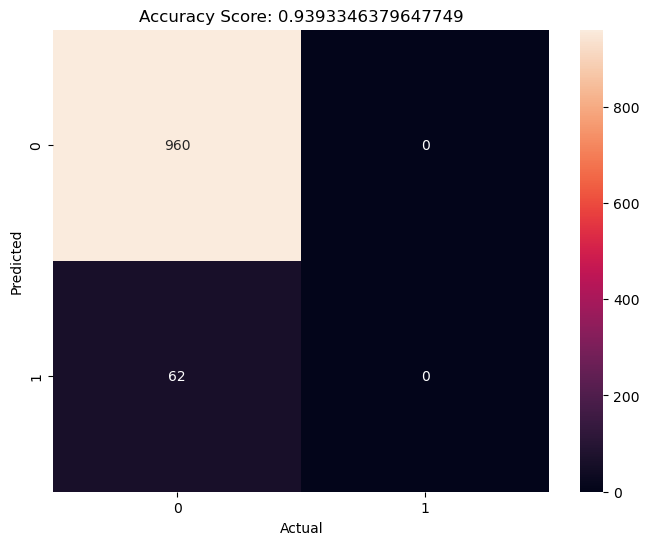

In [138]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(Y_test, pred_svc_test), annot=True, fmt='d')
plt.title('Accuracy Score: {}'.format(accuracy_score(Y_test, pred_svc_test)))
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

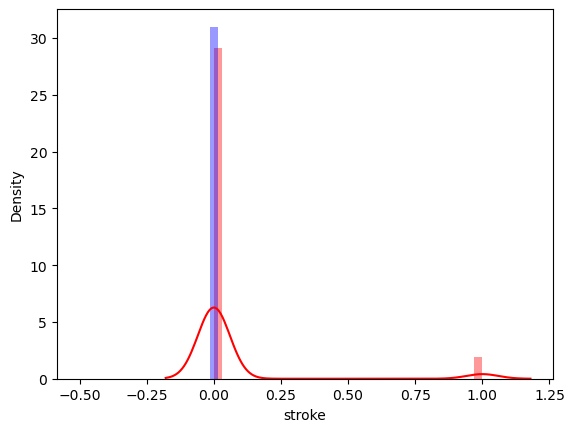

In [143]:
# Distributed plot for the predicted and actual values

ax = sns.distplot(Y_test, hist = True, label = 'Actual', color = 'r')
sns.distplot(pred_svc_test, hist = True, label = 'Predicted', color = 'b', ax = ax)
plt.show()

In [137]:
print('SVM Model Accuracy Score:',accuracy_score(Y_test, pred_svc_test))
print('SVM Model F1 score: ',metrics.f1_score(Y_test, pred_svc_test))
print('SVM Model Mean Absolute Error: ',metrics.mean_absolute_error(Y_test, pred_svc_test))
print('SVM Model Mean Squared Error: ',metrics.mean_squared_error(Y_test, pred_svc_test))
print('SVM Model log loss: ',log_loss(Y_test, pred_svc_test))

SVM Model Accuracy Score: 0.9393346379647749
SVM Model F1 score:  0.0
SVM Model Mean Absolute Error:  0.060665362035225046
SVM Model Mean Squared Error:  0.060665362035225046
SVM Model log loss:  2.0953073742509423


### Decision Tree Classifier

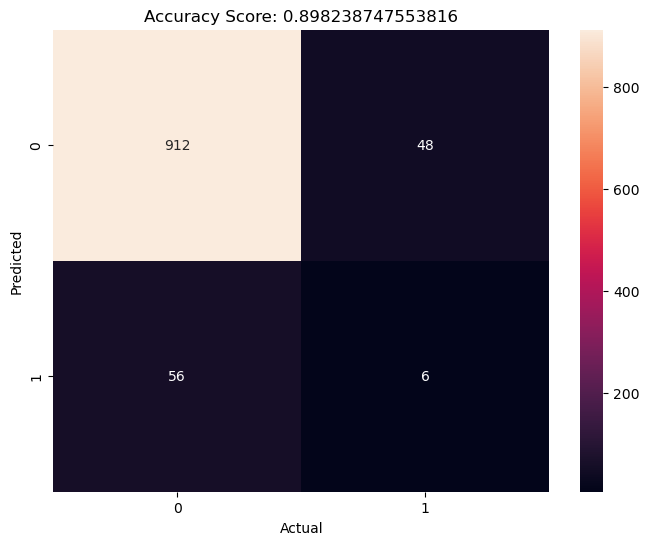

In [139]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(Y_test, pred_DT_test), annot=True, fmt='d')
plt.title('Accuracy Score: {}'.format(accuracy_score(Y_test, pred_DT_test)))
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

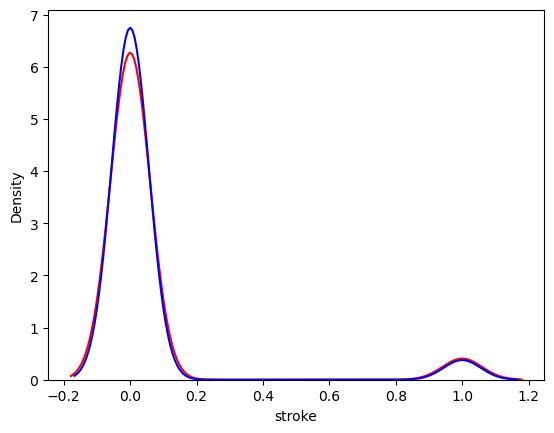

In [140]:
# Distributed plot for the predicted and actual values

ax = sns.distplot(Y_test, hist = False, label = 'Actual', color = 'r')
sns.distplot(pred_DT_test, hist = False, label = 'Predicted', color = 'b', ax = ax)
plt.show()

In [144]:
print('Random Forest Classifier Model Accuracy Score:',accuracy_score(Y_test, pred_DT_test))
print('Random Forest Classifier Model F1 score: ',metrics.f1_score(Y_test, pred_DT_test))
print('Random Forest Classifier Model Mean Absolute Error: ',metrics.mean_absolute_error(Y_test, pred_DT_test))
print('Random Forest Classifier Model Mean Squared Error: ',metrics.mean_squared_error(Y_test, pred_DT_test))
print('Random Forest Classifier Model log loss: ',log_loss(Y_test, pred_DT_test))

Random Forest Classifier Model Accuracy Score: 0.898238747553816
Random Forest Classifier Model F1 score:  0.10344827586206896
Random Forest Classifier Model Mean Absolute Error:  0.10176125244618395
Random Forest Classifier Model Mean Squared Error:  0.10176125244618395
Random Forest Classifier Model log loss:  3.5147466983829356


### K-Nearest Neighbors

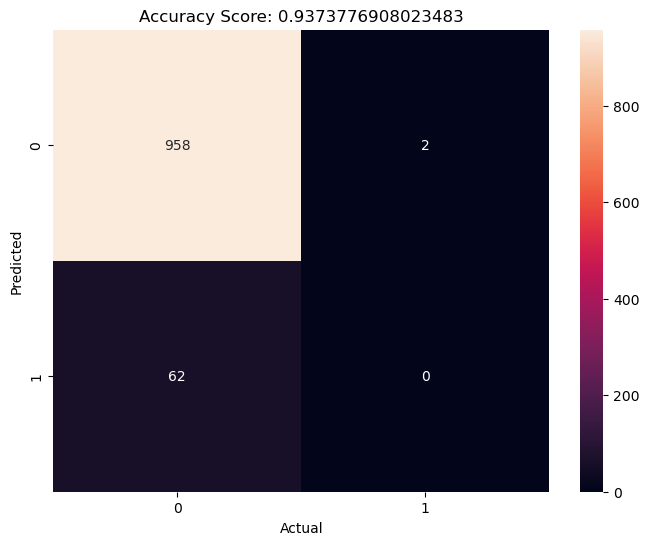

In [145]:
plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(Y_test, pred_knn_test), annot=True, fmt='d')
plt.title('Accuracy Score: {}'.format(accuracy_score(Y_test, pred_knn_test)))
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.show()

In [147]:
print('KNN Model Accuracy Score:',accuracy_score(Y_test, pred_svc_test))
print('KNN Model F1 score: ',metrics.f1_score(Y_test, pred_svc_test))
print('KNN Model Mean Absolute Error: ',metrics.mean_absolute_error(Y_test, pred_svc_test))
print('KNN Model Mean Squared Error: ',metrics.mean_squared_error(Y_test, pred_svc_test))
print('KNN Model log loss: ',log_loss(Y_test, pred_svc_test))

KNN Model Accuracy Score: 0.9393346379647749
KNN Model F1 score:  0.0
KNN Model Mean Absolute Error:  0.060665362035225046
KNN Model Mean Squared Error:  0.060665362035225046
KNN Model log loss:  2.0953073742509423


# Model Comparison

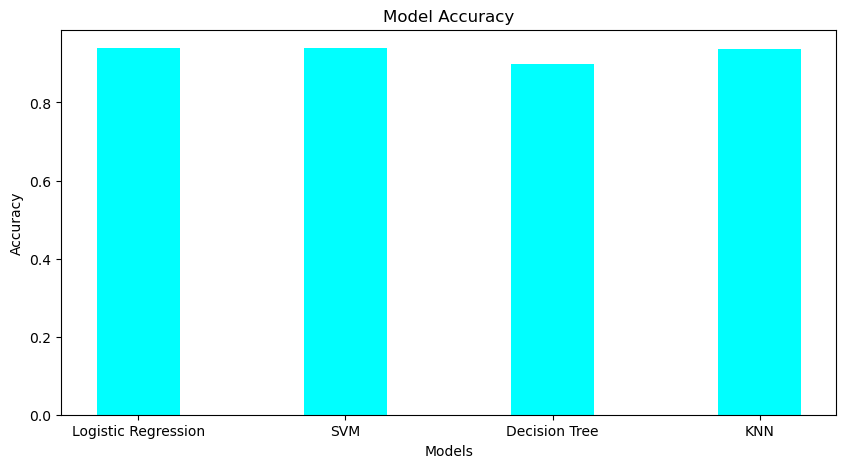

In [151]:
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN']
accuracy = [accuracy_score(Y_test, pred), accuracy_score(Y_test, pred_svc_test), accuracy_score(Y_test, pred_DT_test), accuracy_score(Y_test, pred_knn_test)]
plt.figure(figsize=(10,5))
plt.bar(models, accuracy, color = 'cyan', width = 0.4)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

# Story:


Model Accuracy:

The model accuracies of Logistic Regression, SVM, and KNN are quite similar, at around 93.8%. This means that all three models are able to predict the risk of heart stroke with a high degree of accuracy. However, the Decision Tree Classifier has a slightly lower accuracy of 89.8%. This means that it is more likely to make incorrect predictions than the other three models.


Relationship Between Risk Factors and Stroke:

The graphs of age vs. hypertension and heart disease vs. stroke show that there is a positive correlation between these risk factors and stroke. This means that the higher your age, hypertension, and heart disease risk, the more likely you are to have a stroke.

However, the graph of heart disease and hypertension vs. stroke shows a peculiar trend. People with lower chances of hypertension and heart disease have increased chances of stroke. This could be due to a number of factors, such as other underlying medical conditions or lifestyle choices. More research is needed to understand this relationship better.


Other Risk Factors for Stroke:

The text states that other features such as marital status, residence type, and work type are also showing an effect on the chances of stroke. This is important to note, as it means that there are other factors in addition to age, hypertension, and heart disease that can increase your risk of stroke.

For example, people who are single or divorced may be at higher risk of stroke than married people. This could be due to a number of factors, such as social isolation, stress, or unhealthy lifestyle choices.

Similarly, people who live in rural areas or who have high-stress jobs may also be at higher risk of stroke. This is because rural areas may have less access to healthcare, and high-stress jobs can increase the risk of heart disease and other cardiovascular problems.


Conclusion:

The given text provides a number of important insights into the risk factors for stroke. It is clear that there is a complex relationship between these risk factors, and more research is needed to fully understand them. However, the text also shows that there are a number of things that people can do to reduce their risk of stroke, such as maintaining a healthy lifestyle, managing their blood pressure, and controlling their cholesterol levels.